Obtener un dataset con las valoraciones de Bitcoin de los últimos 365 días.

Con lo que vimos ayer en la clase de API, intenta conseguir ese dataset.  

Graficar.

In [12]:
#Importación de librerías necesarias:
import pandas as pd
import csv
import requests
import re
import ast
import matplotlib
import datetime
import matplotlib.pyplot as plt

In [8]:
ct = str(int(datetime.datetime.now().timestamp()))
c2 = datetime.datetime.now() - datetime.timedelta(days=365)
ct2 = str(int(c2.timestamp()))

APIurl = "https://api.binance.com/api/v3/klines?symbol=BTCUSDT&interval=1d&limit=365&startTime="+ct2+"000&endTime="+ct+"000"
APIresp = requests.get(APIurl)
print(APIresp.ok)
print(APIresp.status_code)
print(APIresp.elapsed)
APIresp.text

True
200
0:00:00.543085


'[[1643068800000,"36660.35000000","37545.14000000","35701.00000000","36958.32000000","49232.40183000",1643155199999,"1799224214.49973920",1248246,"24988.42876000","913198135.60368310","0"],[1643155200000,"36958.32000000","38919.98000000","36234.63000000","36809.34000000","69830.16036000",1643241599999,"2627491976.69085740",1584468,"35240.31542000","1326474948.46322410","0"],[1643241600000,"36807.24000000","37234.47000000","35507.01000000","37160.10000000","53020.87934000",1643327999999,"1925920128.34366030",1308408,"26750.94594000","971815942.27075550","0"],[1643328000000,"37160.11000000","38000.00000000","36155.01000000","37716.56000000","42154.26956000",1643414399999,"1560203931.22012810",1061101,"21496.47551000","795847847.51234220","0"],[1643414400000,"37716.57000000","38720.74000000","37268.44000000","38166.84000000","26129.49682000",1643500799999,"989652386.99664940",816601,"13292.42156000","503624477.65945300","0"],[1643500800000,"38166.83000000","38359.26000000","37351.63000000

In [9]:
# 2.- Crear un dataFrame de los últimos 365 días
x = ast.literal_eval(APIresp.text)

#Crear nueva columna con la longitud de la descripcion
import pandas as pd
df = pd.DataFrame(x)
df

,0,1,2,3,4,5,6,7,8,9,10,11
0,1643068800000,36660.35000000,37545.14000000,35701.00000000,36958.32000000,49232.40183000,1643155199999,1799224214.49973920,1248246,24988.42876000,913198135.60368310,0
1,1643155200000,36958.32000000,38919.98000000,36234.63000000,36809.34000000,69830.16036000,1643241599999,2627491976.69085740,1584468,35240.31542000,1326474948.46322410,0
2,1643241600000,36807.24000000,37234.47000000,35507.01000000,37160.10000000,53020.87934000,1643327999999,1925920128.34366030,1308408,26750.94594000,971815942.27075550,0
3,1643328000000,37160.11000000,38000.00000000,36155.01000000,37716.56000000,42154.26956000,1643414399999,1560203931.22012810,1061101,21496.47551000,795847847.51234220,0
4,1643414400000,37716.57000000,38720.74000000,37268.44000000,38166.84000000,26129.49682000,1643500799999,989652386.99664940,816601,13292.42156000,503624477.65945300,0
...,...,...,...,...,...,...,...,...,...,...,...,...
360,1674172800000,21071.59000000,22755.93000000,20861.28000000,22667.21000000,338079.13659000,1674259199999,7256172889.71053270,7382435,170200.04869000,3654038898.27092860,0
361,1674259200000,22666.00000000,23371.80000000,22422.00000000,22783.55000000,346445.48432000,1674345599999,7938935168.53201350,7796520,172663.17131000,3956916674.40296310,0
362,1674345600000,22783.35000000,23078.71000000,22292.37000000,22707.88000000,253577.75286000,1674431999999,5775552321.54412040,6603827,125842.91663000,2866409820.72257050,0
363,1674432000000,22706.02000000,23180.00000000,22500.00000000,22916.45000000,293588.37938000,1674518399999,6704191295.97568070,7258655,145854.70936000,3330927704.48361020,0


In [10]:
df = df.drop(df.columns[[0,1,2,3,5,7,8,9,10,11]], axis='columns')
df.rename( columns={4 :'Close price'}, inplace=True)
df.rename( columns={6 :'Fecha'}, inplace=True)
df['Nueva Fecha'] = df["Fecha"]//1000
df = df.drop(df.columns[[1]], axis='columns')
df

,Close price,Nueva Fecha
0,36958.32000000,1643155199
1,36809.34000000,1643241599
2,37160.10000000,1643327999
3,37716.56000000,1643414399
4,38166.84000000,1643500799
...,...,...
360,22667.21000000,1674259199
361,22783.55000000,1674345599
362,22707.88000000,1674431999
363,22916.45000000,1674518399


In [17]:
df = df.drop(df.columns[[1]], axis='columns')
df

,Close price
0,36958.32000000
1,36809.34000000
2,37160.10000000
3,37716.56000000
4,38166.84000000
...,...
360,22667.21000000
361,22783.55000000
362,22707.88000000
363,22916.45000000


In [34]:
df["Price"] = df["Close price"].astype('float')
df

,Close price,Price
0,36958.32000000,36958.32
1,36809.34000000,36809.34
2,37160.10000000,37160.10
3,37716.56000000,37716.56
4,38166.84000000,38166.84
...,...,...
360,22667.21000000,22667.21
361,22783.55000000,22783.55
362,22707.88000000,22707.88
363,22916.45000000,22916.45


<function matplotlib.pyplot.show(close=None, block=None)>

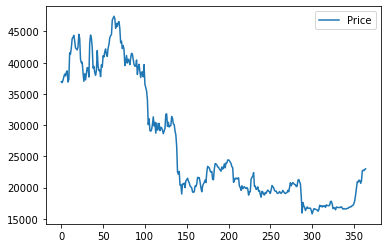

In [40]:
df.plot(kind='line', y='Price')
plt.show

In [7]:
#Convertir 'Nueva Fecha' a formato fecha
df['Fecha Convertida'] = df['Nueva Fecha']

1643155199